In [ ]:
# -*- coding: utf-8 -*-
# -*- author : Vincent Roduit -*-
# -*- date : 2023-11-25 -*-
# -*- Last revision: 2023-11-25 -*-
# -*- python version : 3.11.6 -*-
# -*- Description: Notebook that summarize results-*-

# <center> CS -433 Machine Learning </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Road Segmentation </center>
---

### Preparing environment for Google Colaboratory

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/ml-project-2-team-slo/source

/content/drive/MyDrive/ml-project-2-team-slo/source


### Imports

In [1]:
#import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from constants import *

#import model parameters
from torch.optim.lr_scheduler import ReduceLROnPlateau
%load_ext autoreload
%autoreload 2

In [2]:
#import files
from data_processing import*
from visualization import visualize, visualize_patch
from test_data import TestData

#import models
from cnn import Basic_CNN, Advanced_CNN
from logistic_regression import LogisticRegression

In [3]:
# Set random seed for reproducibility
torch.manual_seed(0)

## 1. Data wrangling and visualization

In [79]:
myDatas = AdvancedProcessing(standardize=False, aug_patch_size=128,num_samples=500)
myDatas.proceed()

Loading data...
Done!
Splitting data...
Done!
Creating patches...
Creating patches for training set...
Rotation for 45 degrees
Rotation for 135 degrees
Rotation for 225 degrees
Rotation for 315 degrees
Batch 1/15
Batch 4/15
Batch 7/15
Batch 10/15
Batch 13/15
end process...
Creating patches for validation set...
Done!
Creating dataloader...
Done!


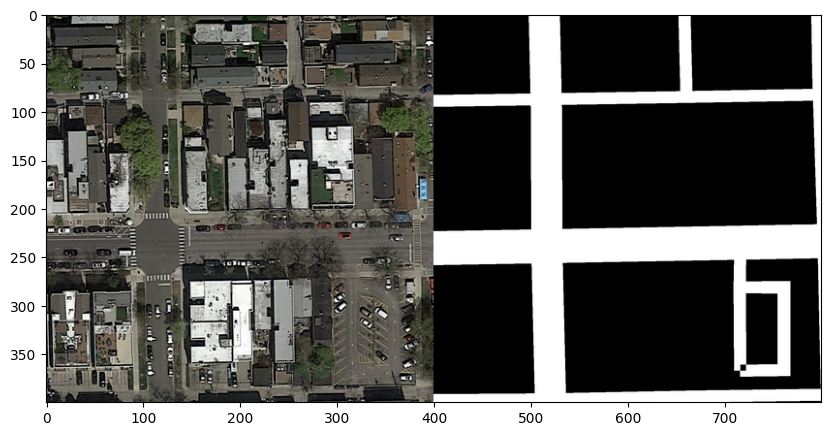

In [80]:
visualize(myDatas.imgs, myDatas.gt_imgs, index=34)

In [85]:
myDatas.y_train[0]

1

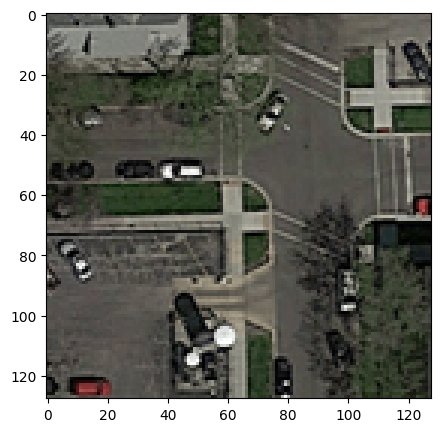

In [86]:
visualize_patch(myDatas.X_train[0].transpose(1,2,0))

In [72]:
from data_augmentation import rotate_imgs_train
rotated_imgs,rotated_imgs_gt = rotate_imgs_train(myDatas.imgs[34:35],myDatas.gt_imgs[34:35])

Rotation for 45 degrees
Rotation for 135 degrees
Rotation for 225 degrees
Rotation for 315 degrees


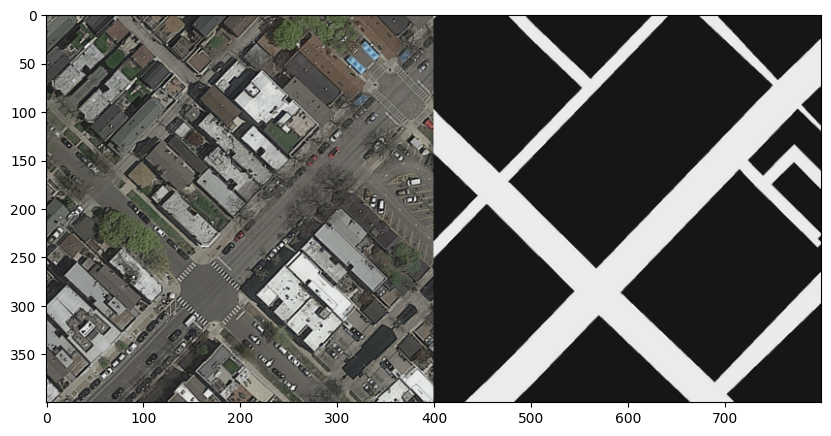

In [73]:
visualize(rotated_imgs, rotated_imgs_gt, index=0)

## 2. Define and train models

### 2.1 Logistic regression

A first attempt could be to try with some linear model. The first approach here is to use a simple logistic regression. In order to use a logistic regression, one need to extract feature from the image. A choice could be to use the mean and the standard deviation as features. The following section will present these approach.

In [ ]:
LogisticData = BasicProcessing()
LogisticData.load_data()
LogisticData.create_patches()

Loading data...
Done!
Creating patches...
Done!


In [ ]:
LogReg = LogisticRegression(LogisticData.imgs_patches, LogisticData.gt_imgs_patches)
LogReg.compute_vectors()

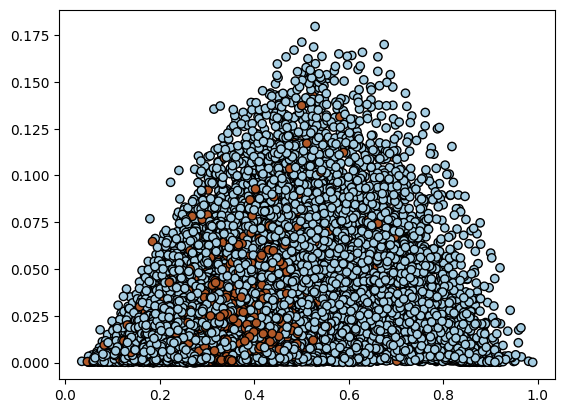

In [ ]:
plt.scatter(LogReg.X[:, 0], LogReg.X[:, 1], c=LogReg.Y, edgecolors="k", cmap=plt.cm.Paired)
plt.show()

A problem already arises. The datas are not linearly separable. Let's still try to train the model.

In [ ]:
LogReg.train()
LogReg.predict()

In [ ]:
print(f'From this model, the accuracy is {LogReg.accuracy*100:.2f}% and the F1 score is {LogReg.f1*100:.2f}%')

From this model, the accuracy is 55.08% and the F1 score is 44.22%


The unsatisfactory results tend us to move to Convolutional Networks, which are more suitable for image datas.

### 2.2 Basic Convolutional Neural Network

In [7]:
# Define the loss function
criterion = nn.BCEWithLogitsLoss()

#### Training on different patch size

Basic model

In [ ]:
# Define the patch size
patch_size = 16

# Load data
myDatas = AdvancedProcessing(standardize=False, aug_patch_size=patch_size)
myDatas.proceed()

# Define the model
cnn = Basic_CNN(patch_size)

# Define the optimizer
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
# Define the scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
cnn.train_model(
    optimizer,
    scheduler,
    criterion,
    myDatas.train_dataloader,
    myDatas.validate_dataloader,
    num_epochs=20)

torch_file_name = f'basic_cnn_{patch_size}.pth'
# Save the model
torch.save(cnn, os.path.join(MODELS_DIR, torch_file_name))

Loading data...
Done!
Splitting data...
Done!
Creating patches...
Creating patches for training set...
Rotation for 45 degrees
Rotation for 135 degrees
Rotation for 225 degrees
Rotation for 315 degrees
Batch 1/4000
Batch 401/4000
Batch 801/4000
Batch 1201/4000
Batch 1601/4000
Batch 2001/4000
Batch 2401/4000
Batch 2801/4000
Batch 3201/4000
Batch 3601/4000
end process...
Creating patches for validation set...
Done!
Creating dataloader...
Done!
Epoch 1/20, Loss: 0.48549815519198336, Validation Accuracy: 0.7847, F1 score: 0.6448
Epoch 2/20, Loss: 0.47952356989012246, Validation Accuracy: 0.7810, F1 score: 0.6588
Epoch 3/20, Loss: 0.4842649176487839, Validation Accuracy: 0.7895, F1 score: 0.6598
Epoch 4/20, Loss: 0.4403870699310303, Validation Accuracy: 0.8030, F1 score: 0.6756
Epoch 5/20, Loss: 0.5265321386790276, Validation Accuracy: 0.7751, F1 score: 0.6649
Epoch 6/20, Loss: 0.4633396848475933, Validation Accuracy: 0.7998, F1 score: 0.6814
Epoch 7/20, Loss: 0.47749528131484986, Validatio

In [ ]:
patch_size = 32

# Load data
myDatas = AdvancedProcessing(standardize=False, aug_patch_size=patch_size)
myDatas.proceed()

# Define the model
cnn = Basic_CNN(patch_size)

# Define the optimizer
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
# Define the scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
cnn.train_model(
    optimizer,
    scheduler,
    criterion,
    myDatas.train_dataloader,
    myDatas.validate_dataloader,
    num_epochs=20)

torch_file_name = f'basic_cnn_{patch_size}.pth'
# Save the model
torch.save(cnn, os.path.join(MODELS_DIR, torch_file_name))

Loading data...
Done!
Splitting data...
Done!
Creating patches...
Creating patches for training set...
Rotation for 45 degrees
Rotation for 135 degrees
Rotation for 225 degrees
Rotation for 315 degrees
Batch 1/4000
Batch 401/4000
Batch 801/4000
Batch 1201/4000
Batch 1601/4000
Batch 2001/4000
Batch 2401/4000
Batch 2801/4000
Batch 3201/4000
Batch 3601/4000
end process...
Creating patches for validation set...
Done!
Creating dataloader...
Done!
Epoch 1/20, Loss: 0.48321799095512835, Validation Accuracy: 0.8038, F1 score: 0.6756
Epoch 2/20, Loss: 0.4565202458971683, Validation Accuracy: 0.8151, F1 score: 0.6957
Epoch 3/20, Loss: 0.45142265379610746, Validation Accuracy: 0.8094, F1 score: 0.6971
Epoch 4/20, Loss: 0.4125677396605209, Validation Accuracy: 0.8282, F1 score: 0.6883
Epoch 5/20, Loss: 0.5330561720681857, Validation Accuracy: 0.7934, F1 score: 0.6936
Epoch 6/20, Loss: 0.4325046360235126, Validation Accuracy: 0.8264, F1 score: 0.7020
Epoch 7/20, Loss: 0.4399315306946647, Validation

In [ ]:
patch_size = 64

# Load data
myDatas = AdvancedProcessing(standardize=False, aug_patch_size=patch_size)
myDatas.proceed()

# Define the model
cnn = Basic_CNN(patch_size)

# Define the optimizer
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
# Define the scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
cnn.train_model(
    optimizer,
    scheduler,
    criterion,
    myDatas.train_dataloader,
    myDatas.validate_dataloader,
    num_epochs=20)

torch_file_name = f'basic_cnn_{patch_size}.pth'
# Save the model
torch.save(cnn, os.path.join(MODELS_DIR, torch_file_name))

Loading data...
Done!
Splitting data...
Done!
Creating patches...
Creating patches for training set...
Rotation for 45 degrees
Rotation for 135 degrees
Rotation for 225 degrees
Rotation for 315 degrees
Batch 1/4000
Batch 401/4000
Batch 801/4000
Batch 1201/4000
Batch 1601/4000
Batch 2001/4000
Batch 2401/4000
Batch 2801/4000
Batch 3201/4000
Batch 3601/4000
end process...
Creating patches for validation set...
Done!
Creating dataloader...
Done!
Epoch 1/20, Loss: 0.4192146766342604, Validation Accuracy: 0.8308, F1 score: 0.7073
Epoch 2/20, Loss: 0.5277434903345488, Validation Accuracy: 0.8114, F1 score: 0.7102
Epoch 3/20, Loss: 0.40349763829214935, Validation Accuracy: 0.8390, F1 score: 0.7050
Epoch 4/20, Loss: 0.40233847902235065, Validation Accuracy: 0.8413, F1 score: 0.7280
Epoch 5/20, Loss: 0.4775314928626585, Validation Accuracy: 0.8214, F1 score: 0.7151
Epoch 6/20, Loss: 0.37210139433962286, Validation Accuracy: 0.8454, F1 score: 0.7000
Epoch 7/20, Loss: 0.4574004708832351, Validatio

Advanced CNN

In [ ]:
patch_size = 64

# Load data
myDatas = AdvancedProcessing(standardize=False, aug_patch_size=patch_size)
myDatas.proceed()

# Define the model
cnn = Advanced_CNN(patch_size)

# Define the optimizer
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
# Define the scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
cnn.train_model(
    optimizer,
    scheduler,
    criterion,
    myDatas.train_dataloader,
    myDatas.validate_dataloader,
    num_epochs=20)

torch_file_name = f'advanced_cnn_{patch_size}.pth'
# Save the model
torch.save(cnn, os.path.join(MODELS_DIR, torch_file_name))

Loading data...
Done!
Splitting data...
Done!
Creating patches...
Creating patches for training set...
Rotation for 45 degrees
Rotation for 135 degrees
Rotation for 225 degrees
Rotation for 315 degrees
Batch 1/4000
Batch 401/4000
Batch 801/4000
Batch 1201/4000
Batch 1601/4000
Batch 2001/4000
Batch 2401/4000
Batch 2801/4000
Batch 3201/4000
Batch 3601/4000
end process...
Creating patches for validation set...
Done!
Creating dataloader...
Done!
Epoch 1/20, Loss: 0.3546229940298665, Validation Accuracy: 0.8529, F1 score: 0.7258
Epoch 2/20, Loss: 0.33589730698342535, Validation Accuracy: 0.8646, F1 score: 0.7426
Epoch 3/20, Loss: 0.3317421379676538, Validation Accuracy: 0.8811, F1 score: 0.7571
Epoch 4/20, Loss: 0.3041651820811638, Validation Accuracy: 0.8720, F1 score: 0.7710
Epoch 5/20, Loss: 0.3697106423130569, Validation Accuracy: 0.8665, F1 score: 0.7635
Epoch 6/20, Loss: 0.3615768435403872, Validation Accuracy: 0.8671, F1 score: 0.7485
Epoch 7/20, Loss: 0.3439291811628445, Validation 

In [ ]:
patch_size = 128

# Load data
myDatas = AdvancedProcessing(standardize=False, aug_patch_size=patch_size)
myDatas.proceed()

# Define the model
cnn = Advanced_CNN(patch_size)

# Define the optimizer
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
# Define the scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
cnn.train_model(
    optimizer,
    scheduler,
    criterion,
    myDatas.train_dataloader,
    myDatas.validate_dataloader,
    num_epochs=20)

torch_file_name = f'advanced_cnn_{patch_size}.pth'
# Save the model
torch.save(cnn, os.path.join(MODELS_DIR, torch_file_name))

Loading data...
Done!
Splitting data...
Done!
Creating patches...
Creating patches for training set...
Rotation for 45 degrees
Rotation for 135 degrees
Rotation for 225 degrees
Rotation for 315 degrees
Batch 1/4000
Batch 401/4000
Batch 801/4000
Batch 1201/4000
Batch 1601/4000
Batch 2001/4000
Batch 2401/4000
Batch 2801/4000
Batch 3201/4000
Batch 3601/4000
end process...
Creating patches for validation set...
Done!
Creating dataloader...
Done!
Epoch 1/20, Loss: 0.29735874482631686, Validation Accuracy: 0.8765, F1 score: 0.7587
Epoch 2/20, Loss: 0.30195956640571353, Validation Accuracy: 0.8899, F1 score: 0.7969
Epoch 3/20, Loss: 0.28036656061203785, Validation Accuracy: 0.8997, F1 score: 0.8117
Epoch 4/20, Loss: 0.30409627061684036, Validation Accuracy: 0.8948, F1 score: 0.8020
Epoch 5/20, Loss: 0.39710762886811174, Validation Accuracy: 0.8954, F1 score: 0.8109
Epoch 6/20, Loss: 0.3501912328348783, Validation Accuracy: 0.8954, F1 score: 0.8084
Epoch 00006: reducing learning rate of group 

#### Color standarization

In [ ]:
patch_size = 128

# Load data
myDatas = AdvancedProcessing(standardize=True, aug_patch_size=patch_size)
myDatas.proceed()

# Define the model
cnn = Advanced_CNN(patch_size)

# Define the optimizer
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
# Define the scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
cnn.train_model(
    optimizer,
    scheduler,
    criterion,
    myDatas.train_dataloader,
    myDatas.validate_dataloader,
    num_epochs=20)

torch_file_name = f'advanced_cnn_color_{patch_size}.pth'
# Save the model
torch.save(cnn, os.path.join(MODELS_DIR, torch_file_name))

Loading data...
Done!
Standardizing...
Done!
Splitting data...
Done!
Creating patches...
Creating patches for training set...
Rotation for 45 degrees
Rotation for 135 degrees
Rotation for 225 degrees
Rotation for 315 degrees
Batch 1/4000
Batch 401/4000
Batch 801/4000
Batch 1201/4000
Batch 1601/4000
Batch 2001/4000
Batch 2401/4000
Batch 2801/4000
Batch 3201/4000
Batch 3601/4000
end process...
Creating patches for validation set...
Done!
Creating dataloader...
Done!
Epoch 1/20, Loss: 0.24425285009710554, Validation Accuracy: 0.9003, F1 score: 0.8088
Epoch 2/20, Loss: 0.2867449607666248, Validation Accuracy: 0.9068, F1 score: 0.8188
Epoch 3/20, Loss: 0.30793917703866736, Validation Accuracy: 0.9027, F1 score: 0.8216
Epoch 4/20, Loss: 0.26033023012034934, Validation Accuracy: 0.9142, F1 score: 0.8342
Epoch 00004: reducing learning rate of group 0 to 1.0000e-04.
Epoch 5/20, Loss: 0.2811298777137547, Validation Accuracy: 0.9240, F1 score: 0.8527
Epoch 6/20, Loss: 0.3109139211026127, Validati

#### Different optimizer

AdamW

In [ ]:
patch_size = 128

# Load data
myDatas = AdvancedProcessing(standardize=True, aug_patch_size=patch_size)
myDatas.proceed()

# Define the model
cnn = Advanced_CNN(patch_size)

# Define the optimizer
optimizer = torch.optim.AdamW(cnn.parameters(), lr=0.001)
# Define the scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
cnn.train_model(
    optimizer,
    scheduler,
    criterion,
    myDatas.train_dataloader,
    myDatas.validate_dataloader,
    num_epochs=20)

torch_file_name = f'advanced_cnn_{patch_size}_adamw.pth'
# Save the model
torch.save(cnn, os.path.join(MODELS_DIR, torch_file_name))

Loading data...
Done!
Standardizing...
Done!
Splitting data...
Done!
Creating patches...
Creating patches for training set...
Rotation for 45 degrees
Rotation for 135 degrees
Rotation for 225 degrees
Rotation for 315 degrees
Batch 1/4000
Batch 401/4000
Batch 801/4000
Batch 1201/4000
Batch 1601/4000
Batch 2001/4000
Batch 2401/4000
Batch 2801/4000
Batch 3201/4000
Batch 3601/4000
end process...
Creating patches for validation set...
Done!
Creating dataloader...
Done!
Epoch 1/20, Loss: 0.291648516248893, Validation Accuracy: 0.8856, F1 score: 0.7780
Epoch 2/20, Loss: 0.25266300833020516, Validation Accuracy: 0.9099, F1 score: 0.8237
Epoch 3/20, Loss: 0.3086755890522344, Validation Accuracy: 0.8914, F1 score: 0.8082
Epoch 4/20, Loss: 0.28781536875515934, Validation Accuracy: 0.9052, F1 score: 0.8277
Epoch 5/20, Loss: 0.260523072334376, Validation Accuracy: 0.9130, F1 score: 0.8357
Epoch 00005: reducing learning rate of group 0 to 1.0000e-04.
Epoch 6/20, Loss: 0.2988196950235963, Validation 

SGD with Nesterov Momentum

In [7]:
patch_size = 128

# Load data
myDatas = AdvancedProcessing(standardize=True, aug_patch_size=patch_size)
myDatas.proceed()

# Define the model
cnn = Advanced_CNN(patch_size)

# Define the optimizer
optimizer = torch.optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9, nesterov=True)
# Define the scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
cnn.train_model(
    optimizer,
    scheduler,
    criterion,
    myDatas.train_dataloader,
    myDatas.validate_dataloader,
    num_epochs=20)

torch_file_name = f'advanced_cnn_{patch_size}_nesterov.pth'
# Save the model
torch.save(cnn, os.path.join(MODELS_DIR, torch_file_name))

Loading data...
Done!
Standardizing...
Done!
Splitting data...
Done!
Creating patches...
Creating patches for training set...
Rotation for 45 degrees
Rotation for 135 degrees
Rotation for 225 degrees
Rotation for 315 degrees
Batch 1/4000
Batch 401/4000
Batch 801/4000
Batch 1201/4000
Batch 1601/4000
Batch 2001/4000
Batch 2401/4000
Batch 2801/4000
Batch 3201/4000
Batch 3601/4000
end process...
Creating patches for validation set...
Done!
Creating dataloader...
Done!
Epoch 1/20, Loss: 0.5331749984359742, Validation Accuracy: 0.7724, F1 score: 0.5923
Epoch 2/20, Loss: 0.42404663986206054, Validation Accuracy: 0.8311, F1 score: 0.7104
Epoch 3/20, Loss: 0.35150414709568023, Validation Accuracy: 0.8630, F1 score: 0.7547
Epoch 4/20, Loss: 0.3013166337251663, Validation Accuracy: 0.8770, F1 score: 0.7691
Epoch 5/20, Loss: 0.3113156132888794, Validation Accuracy: 0.8819, F1 score: 0.7890
Epoch 6/20, Loss: 0.3044166069865227, Validation Accuracy: 0.8821, F1 score: 0.7906
Epoch 7/20, Loss: 0.32071

#### Different thresholds

In [17]:
patch_size = 128

# Define the model
cnn = Advanced_CNN(patch_size,threshold=0.3)

# Define the optimizer
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
# Define the scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
cnn.train_model(
    optimizer,
    scheduler,
    criterion,
    myDatas.train_dataloader,
    myDatas.validate_dataloader,
    num_epochs=20)

torch_file_name = f'advanced_cnn_{patch_size}_thr_03.pth'
# Save the model
torch.save(cnn, os.path.join(MODELS_DIR, torch_file_name))

Epoch 1/20, Loss: 0.2231796808881979, Validation Accuracy: 0.9054, F1 score: 0.8139
Epoch 2/20, Loss: 0.26928355045363306, Validation Accuracy: 0.9052, F1 score: 0.8169
Epoch 3/20, Loss: 0.33902395022376836, Validation Accuracy: 0.8886, F1 score: 0.8080
Epoch 4/20, Loss: 0.2721511058059579, Validation Accuracy: 0.9086, F1 score: 0.8337
Epoch 00004: reducing learning rate of group 0 to 1.0000e-04.
Epoch 5/20, Loss: 0.28973476947856114, Validation Accuracy: 0.9181, F1 score: 0.8506
Epoch 6/20, Loss: 0.3240993248916854, Validation Accuracy: 0.9177, F1 score: 0.8439
Epoch 7/20, Loss: 0.35167864490981343, Validation Accuracy: 0.9222, F1 score: 0.8530
Epoch 00007: reducing learning rate of group 0 to 1.0000e-05.
Epoch 8/20, Loss: 0.38154416108211286, Validation Accuracy: 0.9206, F1 score: 0.8516
Epoch 9/20, Loss: 0.39847766195406725, Validation Accuracy: 0.9207, F1 score: 0.8519
Epoch 10/20, Loss: 0.40012563115173544, Validation Accuracy: 0.9219, F1 score: 0.8535
Epoch 00010: reducing learni

In [25]:
patch_size = 128

# Define the model
cnn = Advanced_CNN(patch_size,threshold=0.2)

# Define the optimizer
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
# Define the scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
cnn.train_model(
    optimizer,
    scheduler,
    criterion,
    myDatas.train_dataloader,
    myDatas.validate_dataloader,
    num_epochs=20)

torch_file_name = f'advanced_cnn_{patch_size}_thr_02.pth'
# Save the model
torch.save(cnn, os.path.join(MODELS_DIR, torch_file_name))

Epoch 1/20, Loss: 0.23028314787642507, Validation Accuracy: 0.9055, F1 score: 0.8269
Epoch 2/20, Loss: 0.26820598865537065, Validation Accuracy: 0.8994, F1 score: 0.8228
Epoch 3/20, Loss: 0.29981591636311017, Validation Accuracy: 0.9085, F1 score: 0.8283
Epoch 4/20, Loss: 0.2601352218612389, Validation Accuracy: 0.9094, F1 score: 0.8390
Epoch 00004: reducing learning rate of group 0 to 1.0000e-04.
Epoch 5/20, Loss: 0.24971938782045153, Validation Accuracy: 0.9231, F1 score: 0.8552
Epoch 6/20, Loss: 0.2836292079728897, Validation Accuracy: 0.9238, F1 score: 0.8537
Epoch 7/20, Loss: 0.3226716965782922, Validation Accuracy: 0.9207, F1 score: 0.8499
Epoch 00007: reducing learning rate of group 0 to 1.0000e-05.
Epoch 8/20, Loss: 0.3407671412121084, Validation Accuracy: 0.9219, F1 score: 0.8511
Epoch 9/20, Loss: 0.3529254985363209, Validation Accuracy: 0.9233, F1 score: 0.8528
Epoch 10/20, Loss: 0.36287072932943903, Validation Accuracy: 0.9228, F1 score: 0.8524
Epoch 00010: reducing learning

In [26]:
myTestDatas = TestData(standardize=True,aug_patch_size=128)
myTestDatas.proceed()
preds = cnn.predict(myTestDatas.test_dataloader)
myTestDatas.create_submission(preds)

Loading data...
Done!
Standardizing...
Done!
Formatting data...
Done!
Creating dataloader...
Done!
Folder '../data/submission/' already exists.
Submission created!
